In [1]:
from scipy.integrate import ode
import numpy as np
import sys
sys.path.append('/Users/hadisalman/codes/nips_pgm/code')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def f(t, y, sigma):
    a = 2.0*np.exp(-np.linalg.norm(y - np.array([0,0]))**2/sigma[0])
    b = np.exp(-np.linalg.norm(y - np.array([0,0]))**2/sigma[1])
    return np.array([a,b])
    
s = np.array([1,1])
xRange = np.linspace(-3,3,100)
yRange = np.linspace(-3,3,100)
xx,yy = np.meshgrid(xRange,yRange)
F1 = np.zeros(xx.flatten().shape)
F2 = np.zeros(xx.flatten().shape)
for idx, (x,y) in enumerate(zip(xx.flatten(),yy.flatten())):
    [F1[idx],F2[idx]] =  f(1,np.array([x,y]),s)
F1 = F1.reshape(xx.shape)
F2 = F2.reshape(yy.shape)

Text(0.5,1,'Vy')

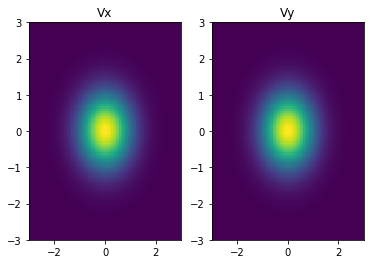

In [3]:
subplot(1,2,1)
pcolormesh(xx,yy,F1)
title('Vx')
subplot(1,2,2)
pcolormesh(xx,yy,F2)
title('Vy')


/home/hadis/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/home/hadis/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:910: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/home/hadis/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


[[0.24382325 0.12191163]
 [0.45693316 0.22846658]
 [0.62895372 0.31447686]
 [0.764635   0.3823175 ]
 [0.87247785 0.43623892]
 [0.95982029 0.47991015]
 [1.03204072 0.51602036]
 [1.09292065 0.54646033]]


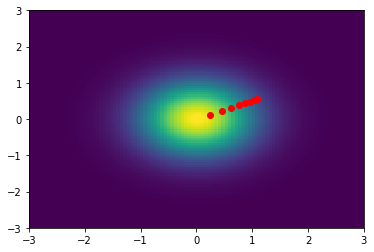

In [4]:
y0 = zeros(2,)
t0 = 0
r = ode(f).set_integrator('dopri5')
r.set_initial_value(y0, t0).set_f_params(s)
t1 = 1.0
dt = 1.0/8
particlePath = []
while r.successful() and r.t < t1:
    r.integrate(r.t+dt)
    particlePath.append(r.y)

particlePath = np.vstack(particlePath)
pcolormesh(xx,yy,F2)
hold(True)
scatter(particlePath[:,0],particlePath[:,1],c='r')

print(particlePath)

Let's implement Exp operation and compare the results with ODE solver:

[[4.65661287e-10 2.32830644e-10]
 [9.31322575e-10 4.65661287e-10]
 [1.39698386e-09 6.98491931e-10]
 [1.86264515e-09 9.31322575e-10]
 [2.32830644e-09 1.16415322e-09]
 [2.79396772e-09 1.39698386e-09]
 [3.25962901e-09 1.62981451e-09]
 [3.72529030e-09 1.86264515e-09]
 [4.19095159e-09 2.09547579e-09]
 [4.65661287e-09 2.32830644e-09]
 [5.12227416e-09 2.56113708e-09]
 [5.58793545e-09 2.79396772e-09]
 [6.05359674e-09 3.02679837e-09]
 [6.51925802e-09 3.25962901e-09]
 [6.98491931e-09 3.49245965e-09]
 [7.45058060e-09 3.72529030e-09]
 [7.91624188e-09 3.95812094e-09]
 [8.38190317e-09 4.19095159e-09]
 [8.84756446e-09 4.42378223e-09]
 [9.31322575e-09 4.65661287e-09]
 [9.77888703e-09 4.88944352e-09]
 [1.02445483e-08 5.12227416e-09]
 [1.07102096e-08 5.35510480e-09]
 [1.11758709e-08 5.58793545e-09]
 [1.16415322e-08 5.82076609e-09]
 [1.21071935e-08 6.05359674e-09]
 [1.25728548e-08 6.28642738e-09]
 [1.30385160e-08 6.51925802e-09]
 [1.35041773e-08 6.75208867e-09]
 [1.39698386e-08 6.98491931e-09]
 [1.443549

/home/hadis/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  from ipykernel import kernelapp as app
/home/hadis/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:910: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/home/hadis/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


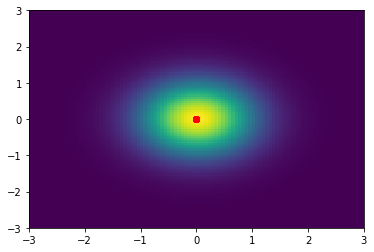

In [5]:
def myCell(f,x, deltaT):
    return x + f(1,x,s)*deltaT

N = 32
t1 = 1.0
dt = 2**-N #1.0/(np.log2(N))
p = y0
particlePath = []
for i in range(N):
    p = myCell(f,p,dt)
    particlePath.append(p)

particlePath = np.vstack(particlePath)
pcolormesh(xx,yy,F2)
hold(True)
scatter(particlePath[:,0],particlePath[:,1],c='r')

print(particlePath)

Do you see!? It doesn't move! Perhaps this is your problem. Now I am going to change `dt`:

/home/hadis/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  if sys.path[0] == '':
/home/hadis/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:910: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/home/hadis/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


[[0.0625     0.03125   ]
 [0.12469557 0.06234778]
 [0.18599253 0.09299627]
 [0.24584754 0.12292377]
 [0.30379955 0.15189977]
 [0.35948945 0.17974473]
 [0.41266644 0.20633322]
 [0.46318292 0.23159146]
 [0.51098138 0.25549069]
 [0.55607718 0.27803859]
 [0.59854044 0.29927022]
 [0.63847944 0.31923972]
 [0.67602656 0.33801328]
 [0.71132722 0.35566361]
 [0.74453165 0.37226583]
 [0.77578909 0.38789455]
 [0.80524385 0.40262193]
 [0.83303297 0.41651649]
 [0.85928483 0.42964241]
 [0.88411857 0.44205929]
 [0.90764406 0.45382203]
 [0.92996208 0.46498104]
 [0.95116481 0.4755824 ]
 [0.97133636 0.48566818]
 [0.99055343 0.49527671]
 [1.00888585 0.50444293]
 [1.02639727 0.51319864]
 [1.04314567 0.52157283]
 [1.0591839  0.52959195]
 [1.07456022 0.53728011]
 [1.08931868 0.54465934]
 [1.10349961 0.5517498 ]]


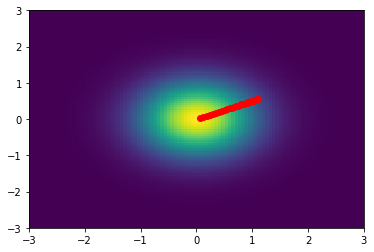

In [6]:
N = 32
t1 = 1.0
dt = 1.0/N
p = y0
particlePath = []
for i in range(N):
    p = myCell(f,p,dt)
    particlePath.append(p)

particlePath = np.vstack(particlePath)
pcolormesh(xx,yy,F2)
hold(True)
scatter(particlePath[:,0],particlePath[:,1],c='r')

print(particlePath)

This seems more accurate! I think I am missing something in this paper (See page 15):

http://www-sop.inria.fr/asclepios/Publications/Tom.Vercauteren/DiffeoDemons-NeuroImage08-Vercauteren.pdf

He said explicitly $2^{-N}$ Not $N$. But I cannot find where the $2^{-N}$ came from!

RESNET FLOW TEST

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd

class ResnetFlow(object):
    def __init__(self, n_flows, z_dim, dt):
        self.num_flows = n_flows
        self.z_dim = z_dim
        self.dt = dt
        with tf.variable_scope('resnet',reuse=tf.AUTO_REUSE):
            self.w1 = tf.get_variable(name='weight1', shape=[self.z_dim, self.z_dim], initializer=tf.constant_initializer(.5))
            self.b1 = tf.get_variable(name='bias1', shape=[self.z_dim], initializer=tf.constant_initializer(.5))
            self.w2 = tf.get_variable(name='weight2', shape=[self.z_dim, self.z_dim], initializer=tf.constant_initializer(.5))
            self.b2 = tf.get_variable(name='bias2', shape=[self.z_dim], initializer=tf.constant_initializer(.5))

    def resnet_block(self, z_in):
        h = tf.nn.relu(tf.matmul(z_in, self.w1 ) + self.b1)
        h = tf.matmul(h, self.w2 ) + self.b2
        return h
    
    def flow(self, z0):
        z_in = z0
        for i in range(self.num_flows):
            with tf.variable_scope('res'+str(i+1)):
                res = self.resnet_block(z_in)
                z_k = z_in + res*self.dt
                z_in = z_k
        return z_k
def f2(t, y, sess, block):
    return sess.run(block, feed_dict={Y: np.reshape(y,[1,2])})

z_dim = 2
Y = tf.placeholder(tf.float32, shape =[None, z_dim])
block = ResnetFlow(2, 2, 0.1).resnet_block(Y) #the params of ResnetFlow instanace doesn't matter here

sess = tf.Session()
sess.run(tf.global_variables_initializer())

y0 = zeros(2,)
t0 = 0
r = ode(f2).set_integrator('dopri5')
r.set_initial_value(y0, t0).set_f_params(sess, block)
t1 = 1.0
dt = 1.0/8
particlePath = []
while r.successful() and r.t < t1:
    r.integrate(r.t+dt)
    particlePath.append(r.y)

particlePath = np.vstack(particlePath)

plotting_data=[] #(num_flows, error)
for num_flows in arange(1,65):
    dt = 1.0/num_flows
    flow = ResnetFlow(num_flows, z_dim, dt)
    Y = tf.placeholder(tf.float32, shape =[None, z_dim])
    z_k = flow.flow(Y)
    block = flow.resnet_block(Y)

    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    z_end = sess.run(z_k, feed_dict={Y: np.reshape([0,0],[1,2])})
    error = np.linalg.norm(z_end - particlePath[-1])/np.linalg.norm(particlePath[-1])
    plotting_data.append([num_flows,error])

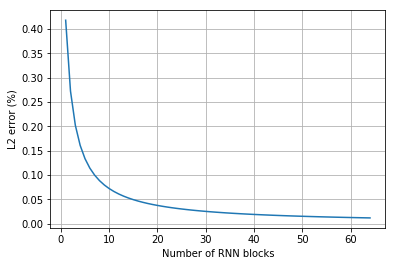

In [4]:
df = pd.DataFrame (plotting_data)
filepath = '../code/ode_approx.xlsx'
df.to_excel(filepath, index=False)

plotting_data = np.asarray(plotting_data)
plot(plotting_data[:,0], plotting_data[:,1])
plt.grid()
xlabel('Number of RNN blocks')
ylabel('L2 error (%)')

# title('Error between ODE solver solution and resnet \n flow solution of integrating a velocity field')
plt.savefig('ODE solver approx',dpi=200)